In [50]:
import numpy as np
import pandas as pd
import nltk

In [51]:
df = pd.read_csv('/content/spam.csv',encoding='latin-1')

In [52]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1479,ham,My trip was ok but quite tiring lor. Uni start...,NaN,NaN,NaN
1321,ham,"I wake up long ago already... Dunno, what othe...",NaN,NaN,NaN
1185,ham,Annoying isn't it.,NaN,NaN,NaN
2667,ham,Why de. You looking good only:-)..,NaN,NaN,NaN
307,ham,Lol yes. Our friendship is hanging on a thread...,NaN,NaN,NaN


In [53]:
df.shape

(5572, 5)

In [54]:
#Stages of project
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvements
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [56]:
#Drop Last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [57]:
df.sample(5)

,v1,v2
2657,ham,Dai &lt;#&gt; naal eruku.
5036,ham,(You didn't hear it from me)
4071,spam,Loans for any purpose even if you have Bad Cre...
2992,ham,So i'm doing a list of buyers.
1295,ham,TELL HER I SAID EAT SHIT.


In [58]:
# renaming the columns
df.rename(columns={'v1' : 'target', 'v2':'text'},inplace = True)

In [59]:
df.sample(5)

,target,text
1269,ham,"Tee hee. Off to lecture, cheery bye bye."
1014,ham,"Ya, told..she was asking wats matter?"
1908,ham,Hello beautiful r u ok? I've kinda ad a row wi...
1605,ham,When you came to hostel.
5532,ham,happened here while you were adventuring


In [60]:
# Apply label encoder on Target column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [61]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [62]:
df['target'] = encoder.fit_transform(df['target'])

In [63]:
df.sample(5)

,target,text
4625,0,Lol ... I knew that .... I saw him in the doll...
2785,0,Yeah get the unlimited
1133,0,"As I entered my cabin my PA said, '' Happy B'd..."
4961,0,Yup ok...
5158,0,I will come with karnan car. Please wait till ...


In [64]:
## checking missing values
df.isnull().sum()

,0
target,0
text,0


In [65]:
##Check for duplicate values
df.duplicated().sum()

403

In [66]:
df.drop_duplicates(keep = 'first',inplace = True)

In [67]:
df.duplicated().sum()

0

In [68]:
df.shape

(5169, 2)

2. **EDA**

In [69]:
#Check balaced/imbalanced data
df['target'].value_counts()

,count
target,
0,4516
1,653


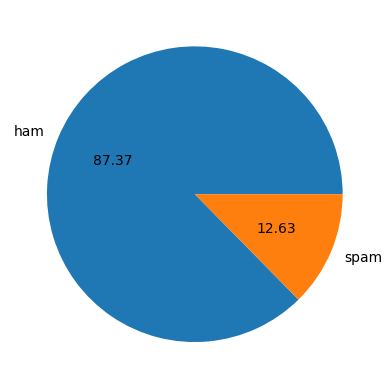

In [70]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [71]:
## Data is imbalanced

In [72]:
#import nltk-- natural language tool kit (nlp library)
import nltk

In [73]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [74]:
df['text']

,text
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will Ì_ b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [75]:
!pip install nltk

In [76]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [77]:
#Num of character
df['num_characters'] = df['text'].apply(len)

In [78]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [79]:
# num of word
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [80]:
# num of sentence
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [81]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [82]:
df[['num_characters',	'num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [83]:
df[df['target']==0][['num_characters',	'num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [84]:
df[df['target']==1][['num_characters',	'num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [85]:
## Spam message is generally lengthy than not spam

In [86]:
import seaborn as sns

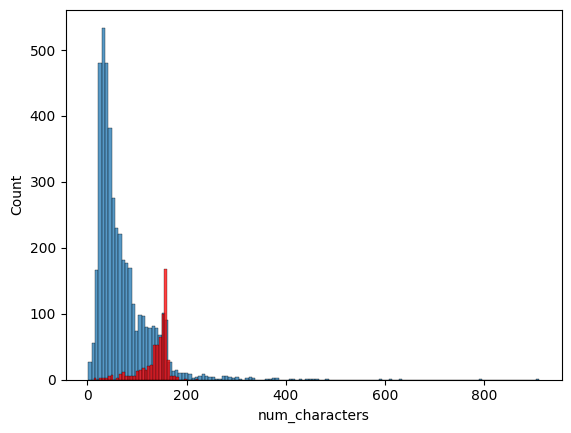

<Figure size 1600x600 with 0 Axes>

In [87]:

sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color = 'red',legend = True)
plt.figure(figsize=(16,6))
plt.show()


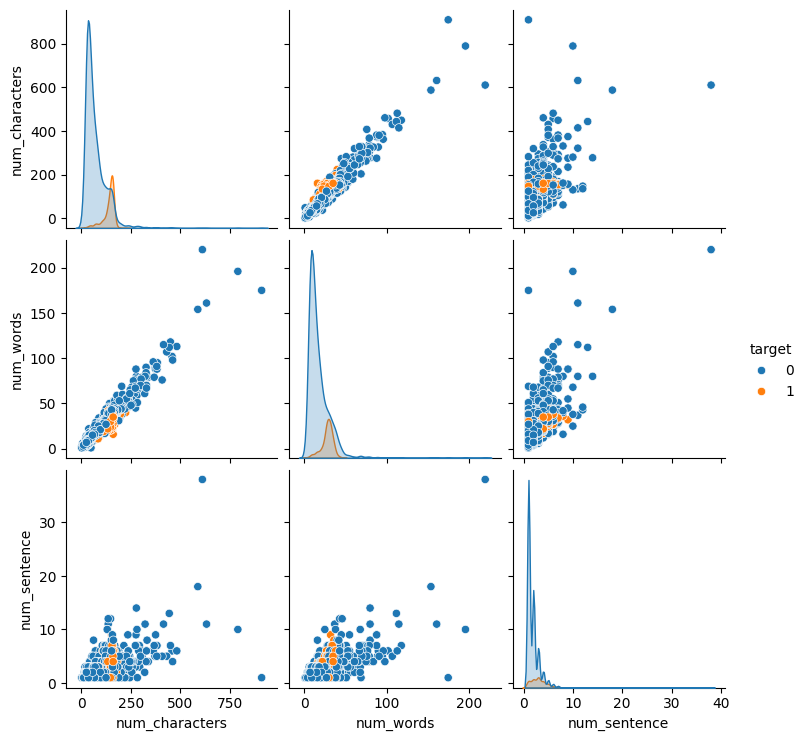

In [88]:
sns.pairplot(df,hue = 'target')

In [89]:
df[['target','num_characters','num_words','num_sentence']].corr()

,target,num_characters,num_words,num_sentence
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentence,0.263939,0.624139,0.679971,1.000000


<Axes: >

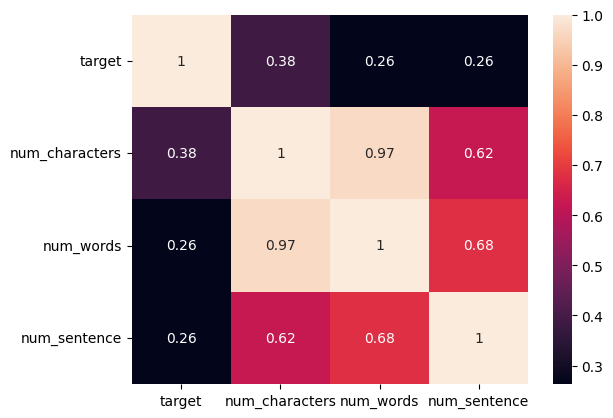

In [90]:
sns.heatmap(df[['target','num_characters','num_words','num_sentence']].corr(),annot=True)

In [91]:
#num_char has max corelation with target . Also num_char,num_words,num_sent has high multicollinearity. So we take only one column.

3. Data Preprocessing
Lower case
Tokenization
Removing special characters
Removing stop words and punctuation
Stemming

In [92]:
def transform_text(text):
  text = text.lower()             #Lower case
  text = nltk.word_tokenize(text) #Tokenization
  y = []
  for i in text:                  #Removing special characters
    if i.isalnum():
      y.append(i)

  text = y[:]   #Creates a shallow copy of the list y and assigns it to the variable text
  y.clear()

  for i in text:                  #Removing stop words and punctuation
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()
  for i in text:                  #Stemming
    y.append(ps.stem(i))

  return " ".join(y)   #Return as string

In [93]:
transform_text('Hello World i am boss % ! ? loving cat')

'hello world boss love cat'

In [94]:
# English stopwords list
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [95]:
#For punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [96]:
#Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [97]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [98]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [99]:
df['transformed_text'] = df['text'].apply(transform_text)

In [100]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [101]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color = 'white')

In [102]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))     #Show words used in spam sms

<Figure size 1500x600 with 0 Axes>

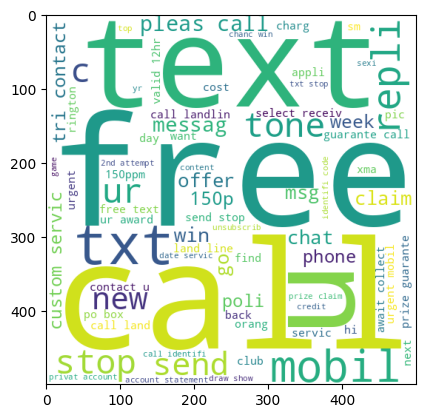

<Figure size 1500x600 with 0 Axes>

In [103]:
plt.imshow(spam_wc)
plt.figure(figsize=(15,6))

<Figure size 1500x600 with 0 Axes>

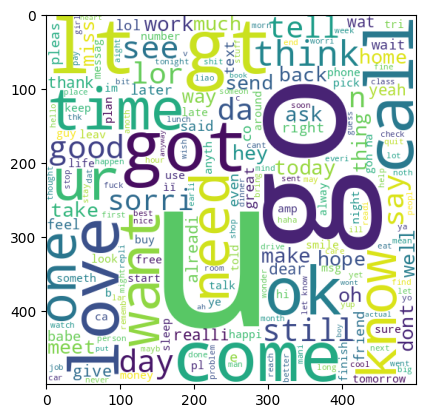

<Figure size 1500x600 with 0 Axes>

In [104]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))      #Show words used in ham sms
plt.imshow(ham_wc)
plt.figure(figsize=(15,6))

In [105]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [106]:
#Fetch all spam words
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)


In [107]:
len(spam_corpus)

9939

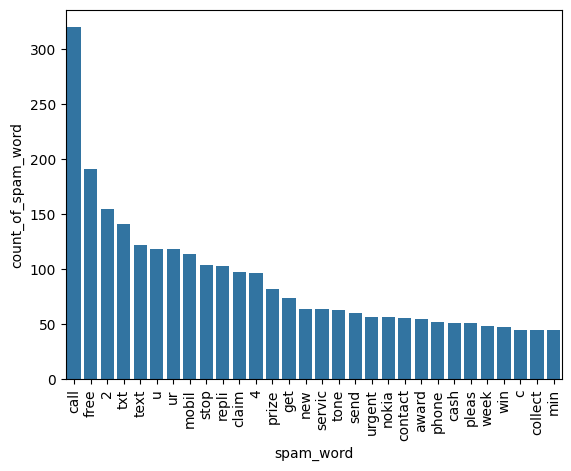

In [108]:
#Fetch most common spam words
from collections import Counter
df1 = pd.DataFrame(Counter(spam_corpus).most_common(30))
df1.rename(columns={0: 'spam_word', 1: 'count_of_spam_word'}, inplace=True)

sns.barplot(x=df1['spam_word'],y=df1['count_of_spam_word'])
plt.xticks(rotation='vertical')
plt.show()

In [109]:
#ham sms
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [110]:
len(ham_corpus)

35404

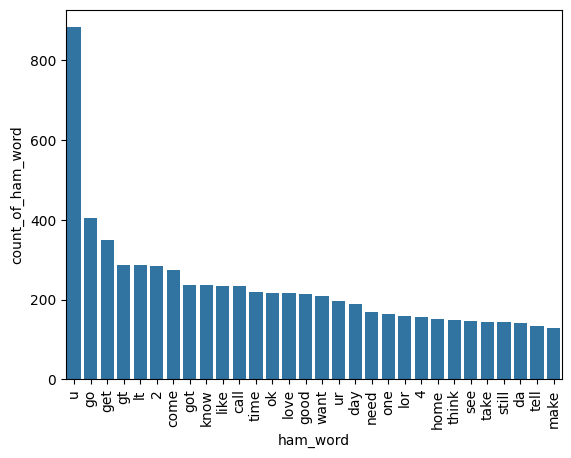

In [111]:
#Fetch most common ham words
from collections import Counter
df1 = pd.DataFrame(Counter(ham_corpus).most_common(30))
df1.rename(columns={0: 'ham_word', 1: 'count_of_ham_word'}, inplace=True)

sns.barplot(x=df1['ham_word'],y=df1['count_of_ham_word'])
plt.xticks(rotation='vertical')
plt.show()

4. Model Building

In [170]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [171]:
df['transformed_text'].shape

(5169,)

In [172]:
#X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [173]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [174]:
X.shape

(5169, 3000)

In [175]:
y = df['target'].values

In [176]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [179]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [180]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [181]:
#Gausian NB
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print('Accuracy Score',accuracy_score(y_test,y_pred1))
print('Confusion Matrix',confusion_matrix(y_test,y_pred1))
print('Precision Score',precision_score(y_test,y_pred1))

Accuracy Score 0.8694390715667312
Confusion Matrix [[788 108]
 [ 27 111]]
Precision Score 0.5068493150684932


In [182]:
#Multinomial NB
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print('Accuracy Score',accuracy_score(y_test,y_pred2))
print('Confusion Matrix',confusion_matrix(y_test,y_pred2))
print('Precision Score',precision_score(y_test,y_pred2))

Accuracy Score 0.9709864603481625
Confusion Matrix [[896   0]
 [ 30 108]]
Precision Score 1.0


In [183]:
#Bernoulli NB
bnb.fit(X_train,y_train)
y_pred3 = mnb.predict(X_test)
print('Accuracy Score',accuracy_score(y_test,y_pred3))
print('Confusion Matrix',confusion_matrix(y_test,y_pred3))
print('Precision Score',precision_score(y_test,y_pred3))

Accuracy Score 0.9709864603481625
Confusion Matrix [[896   0]
 [ 30 108]]
Precision Score 1.0


In [184]:
#tfid--mnb giving best accuracy and 100 percent precision

In [185]:
#Trying out different algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [186]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [187]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [188]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [189]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [190]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9284332688588007
Precision -  0.82
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8488372093023255
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [168]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [169]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
10,xgb,0.972921,0.943548
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595
3,DT,0.936170,0.846154


In [191]:
# model improve
# 1. Change the max_features parameter of TfIdf
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [192]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [193]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.971954,1.000000,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,xgb,0.972921,0.943548,0.967118,0.926230
6,LR,0.951644,0.940000,0.958414,0.970297
7,GBDT,0.952611,0.923810,0.946809,0.919192
8,BgC,0.958414,0.862595,0.958414,0.868217
9,DT,0.936170,0.846154,0.928433,0.820000


In [194]:
#tfidf---MNB--max_feat3000 is final model

In [195]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))